In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ds = Dataset('../../downloads/Buoy/extractedGZ/WINDS/T_00N_095W_WINDS_2000.nc')
ds.variables.keys()

dict_keys(['TIME', 'HEIGHT', 'LATITUDE', 'LONGITUDE', 'WDIR', 'WDIR_QC', 'WDIR_DM', 'WSPD', 'WSPD_QC', 'WSPD_DM', 'UWND', 'VWND'])

In [11]:
wspd = np.array(ds.variables['WSPD'])
wdir = np.array(ds.variables['WDIR'])

uwnd = np.array(ds.variables['UWND'])
vwnd = np.array(ds.variables['VWND'])

mask = abs(wspd)>1000
mask += abs(wdir) >100
mask += abs(uwnd) >100
mask += abs(vwnd) >100

In [19]:
u = wspd * np.cos(np.deg2rad(360-wdir+90))
v = wspd * np.sin(np.deg2rad(360-wdir+90))

u[mask] = float('nan')
v[mask]= float('nan')
uwnd[mask] = float('nan')
vwnd[mask] = float('nan')

uwnd[mask] = float('nan')
vwnd[mask] = float('nan')

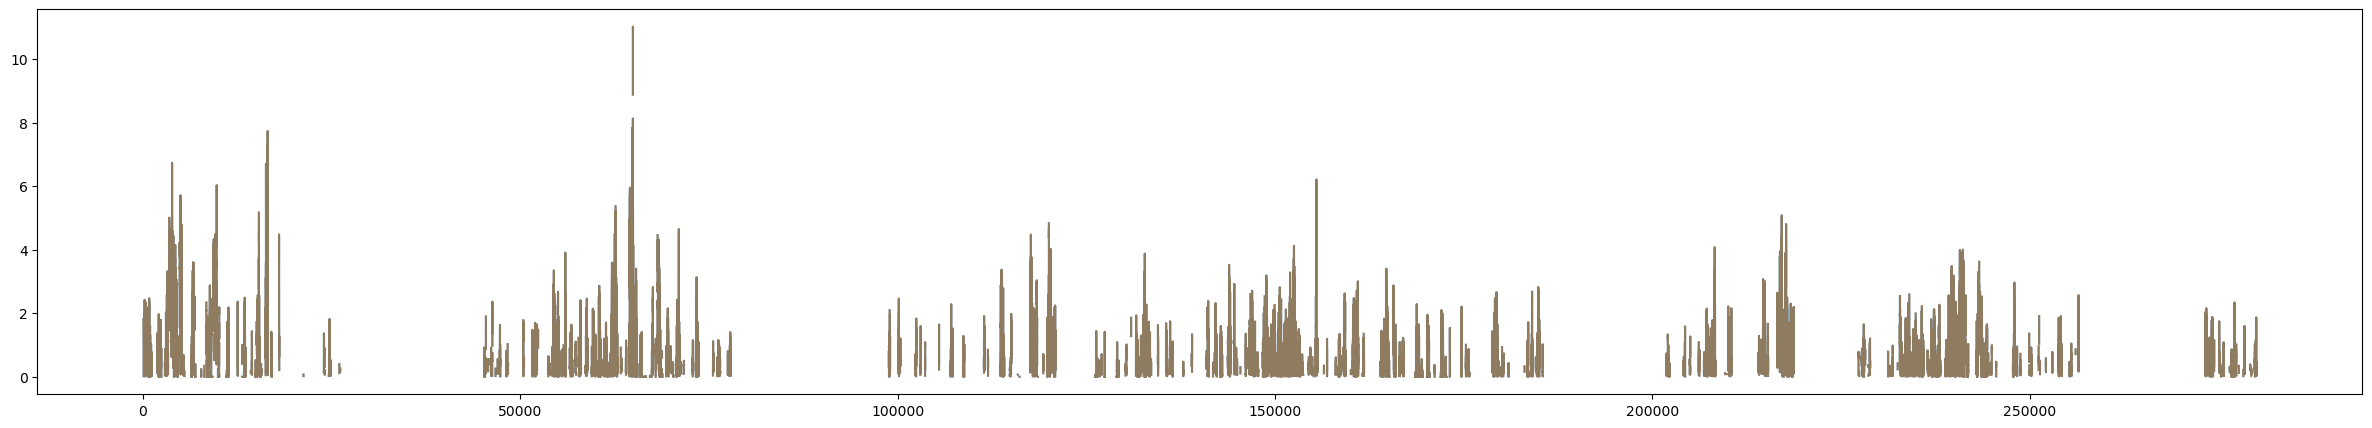

In [20]:
plt.figure(figsize=(30,5))
plt.plot(u)
plt.plot(uwnd, alpha=0.5)